https://www.kaggle.com/c/data-science-for-good-city-of-los-angeles/data

https://www.kaggle.com/camnugent/california-housing-prices

https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016/downloads/suicide-rates-overview-1985-to-2016.zip/1

https://www.kaggle.com/zillow/zecon

In [1]:

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# import data
fn = 'LA1990housing.csv'    # filename
df = pd.read_csv(fn)    # save file as df
# df = df.iloc[:, 2:]
# df = df.dropna(subset=['total_bedrooms'])


'''
Feature Engineering
'''
# subsetting data
df['rooms_households'] = df['total_rooms']/df['households']    # all rooms / households
df['bedrooms_households'] = df['total_bedrooms']/df['households']    # bedrooms / household
df['pop_household'] = df['population']/df['households']    # pop / households

# ocean proximity - dummy coding
df['ocean_proximity'] = df.ocean_proximity.replace({'<1H OCEAN':'1H OCEAN'})    # clean 1h ocean
df = pd.concat([df, pd.get_dummies(df.ocean_proximity)], axis=1)    # 


# impuning data
df.loc[df.total_bedrooms.isna() == True, 'total_bedrooms'] = int(df.total_bedrooms.mode())


df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_households,bedrooms_households,pop_household,1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467,0,0,0,1,0


In [2]:
'''
removing outliers 
- above or below std dev and mean
    - housing values
    - income values
'''
# housing value medians
max_std = (df.median_house_value.mean() + (df.median_house_value.std()*2))
min_std = (df.median_house_value.mean() - (df.median_house_value.std()*2))
mask = ((df.median_house_value < max_std) & (df.median_house_value > min_std))
df = df.loc[mask]


# income medians
max_std = (df.median_income.mean() + (df.median_income.std()*2))
min_std = (df.median_income.mean() - (df.median_income.std()*2))
mask = ((df.median_income < max_std) & (df.median_income > min_std))
df = df.loc[mask]


# scaling up median income
df['median_income_scale'] = df.median_income * 10000


df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_households,bedrooms_households,pop_household,1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_income_scale
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945,0,0,0,1,0,56431.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467,0,0,0,1,0,38462.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,4.761658,1.103627,2.139896,0,0,0,1,0,40368.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.931907,0.951362,2.128405,0,0,0,1,0,36591.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,4.797527,1.061824,1.788253,0,0,0,1,0,31200.0


In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_households,bedrooms_households,pop_household,1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_income_scale
count,18500.000000,18500.000000,18500.000000,18500.000000,18500.000000,18500.000000,18500.000000,18500.000000,18500.000000,18500.000000,18312.000000,18500.000000,18500.000000,18500.000000,18500.000000,18500.000000,18500.000000,18500.000000
mean,-119.559111,35.668852,28.569568,2579.025838,539.027189,1447.145838,502.538486,3.474293,180612.778216,5.268036,1.098983,3.046265,0.428541,0.344000,0.000162,0.102973,0.124324,34742.929351
std,2.004507,2.162757,12.412865,2123.156447,420.701367,1139.995366,382.736702,1.300449,85510.675126,2.291723,0.462734,6.084640,0.494881,0.475054,0.012734,0.303932,0.329960,13004.487205
min,-124.350000,32.540000,1.000000,2.000000,2.000000,6.000000,2.000000,0.643300,14999.000000,0.846154,0.375000,0.692308,0.000000,0.000000,0.000000,0.000000,0.000000,6433.000000
25%,-121.680000,33.940000,18.000000,1427.000000,295.000000,801.000000,282.000000,2.477850,113200.000000,4.381573,1.007242,2.446186,0.000000,0.000000,0.000000,0.000000,0.000000,24778.500000
50%,-118.510000,34.280000,29.000000,2083.000000,435.000000,1184.500000,412.000000,3.343050,166700.000000,5.124216,1.050433,2.839080,0.000000,0.000000,0.000000,0.000000,0.000000,33430.500000
75%,-118.000000,37.730000,37.000000,3075.000000,647.000000,1753.000000,607.000000,4.363600,233000.000000,5.848350,1.101101,3.316070,1.000000,1.000000,0.000000,0.000000,0.000000,43636.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,6.670400,437500.000000,132.533333,34.066667,599.714286,1.000000,1.000000,1.000000,1.000000,1.000000,66704.000000


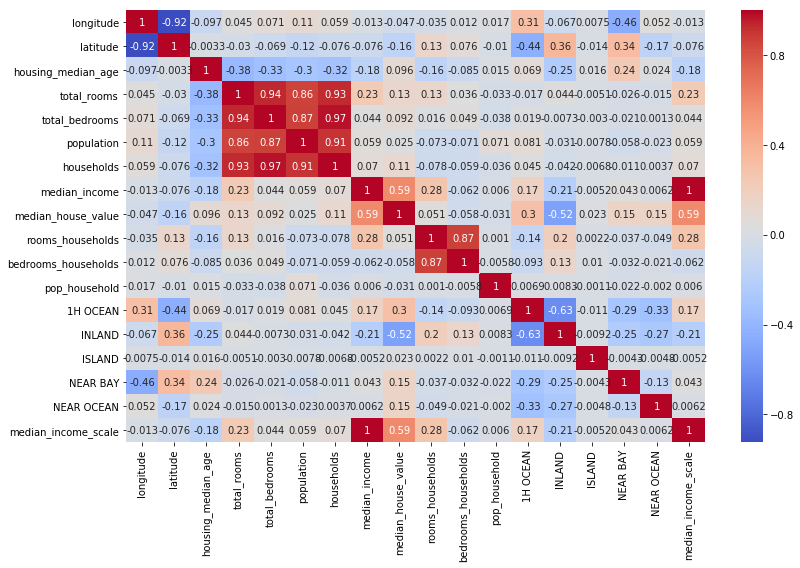

In [4]:
# shows correlation with all the columns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

In [15]:
list(df.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity',
 'rooms_households',
 'bedrooms_households',
 'pop_household',
 '1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN',
 'median_income_scale']

<Figure size 864x576 with 0 Axes>

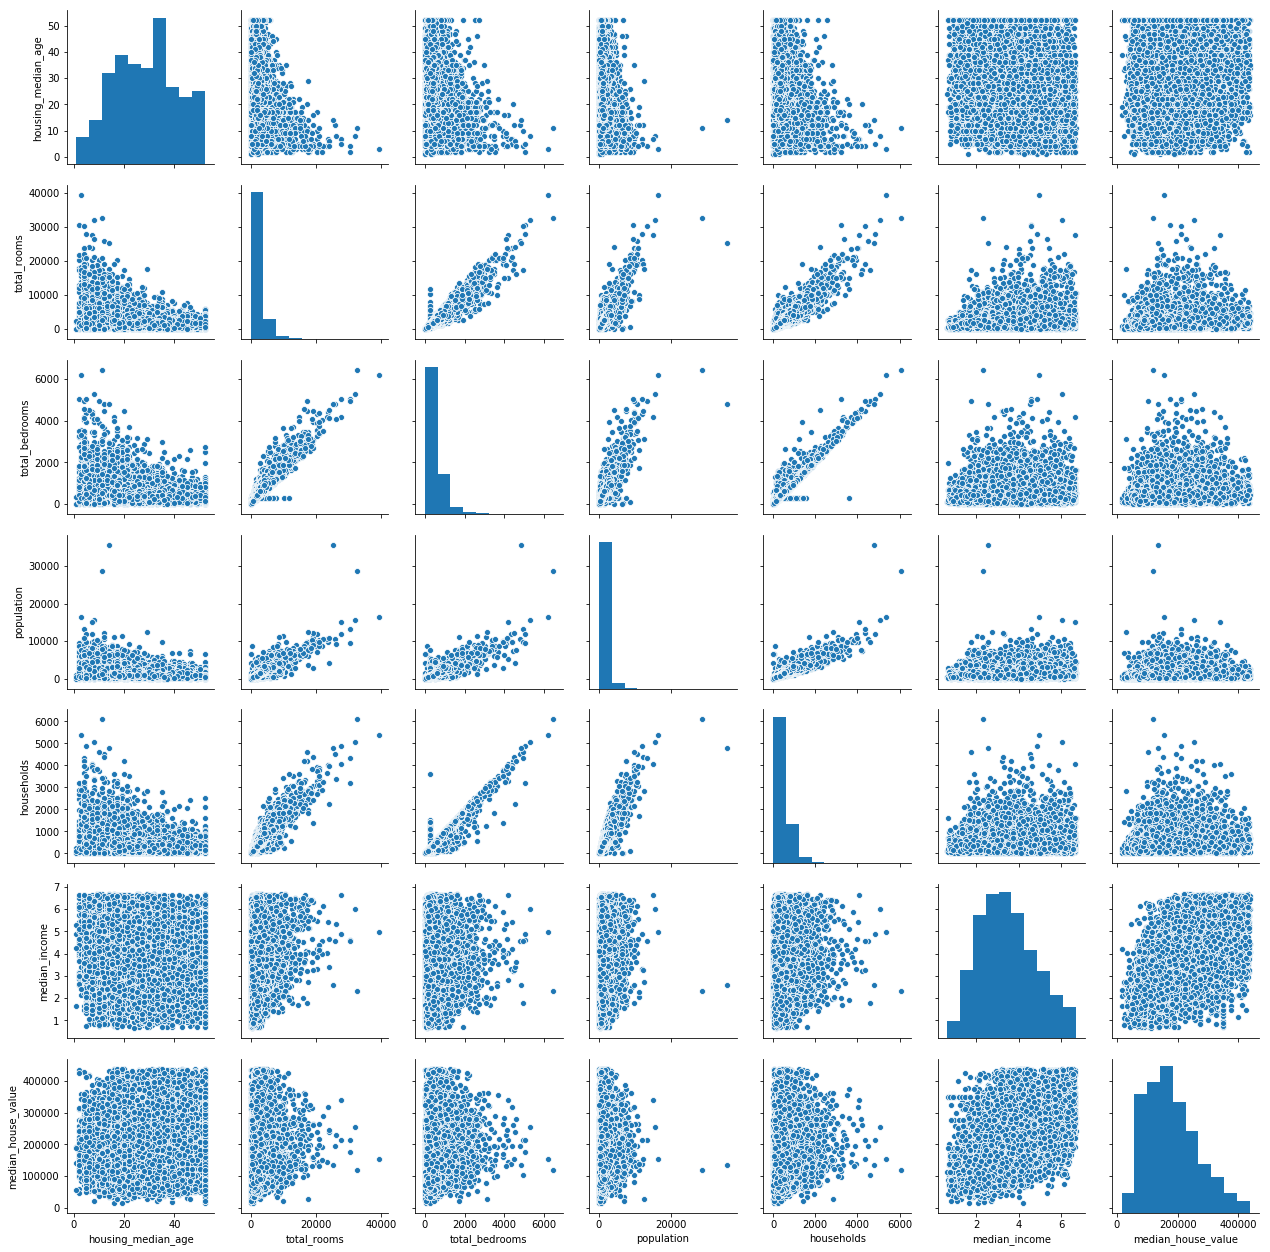

In [22]:
plt.figure(figsize=(12,8))
col = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity',]
sns.pairplot(df.loc[:, col])

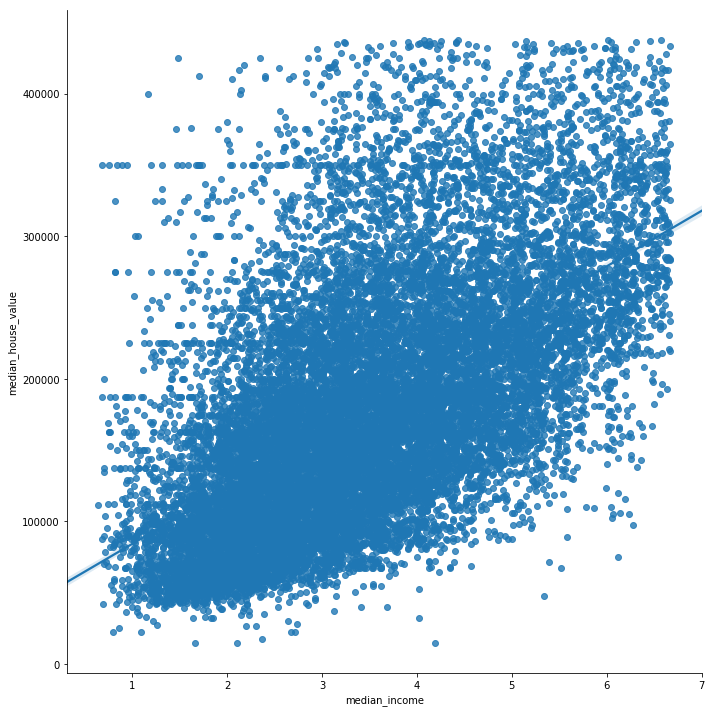

In [42]:
sns.lmplot(
    x='median_income',
    y='median_house_value', 
    data=df, 
    height=10,
    ci=99,
)


-----------------------------------------------------
	Target Information
count     18500.000000
mean     180612.778216
std       85510.675126
min       14999.000000
25%      113200.000000
50%      166700.000000
75%      233000.000000
max      437500.000000
Name: median_house_value, dtype: float64

-----------------------------------------------------
	Metrics
Intercept: 15279.919403782958
Variance score (R2): 0.51

	Features
                        Coef
median_income   33656.360234
1H OCEAN        69847.374678
ISLAND         304061.515146
NEAR BAY        81514.448842
NEAR OCEAN      82637.672354

-----------------------------------------------------
MAE:  45365.75115451171
MSE:  3580377476.536453
RMSE:  59836.25553572393

-----------------------------------------------------

Sample Predictions
Predicted Value : 189818.76822495656
Actual Value : 170600.0

-----------------------------------------------------


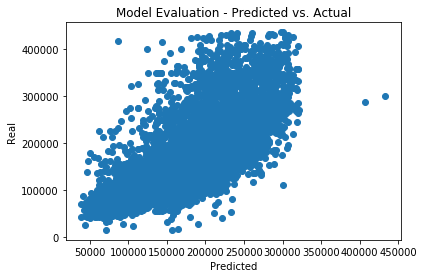

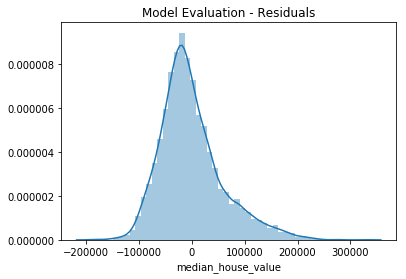

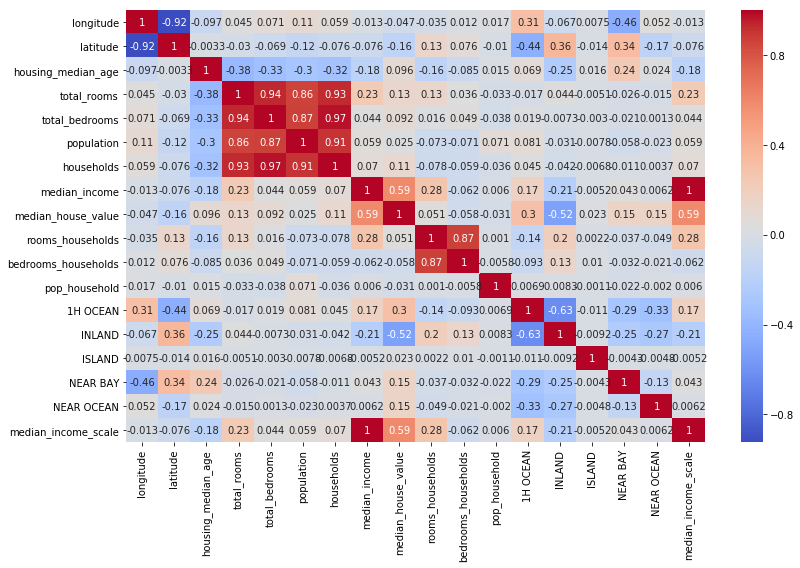

In [45]:
# features/predictors
features = ['median_income', '1H OCEAN', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']    # list of features - add one or multiple
X = df[features]    # save predictors as X


# target/prediction
target = 'median_house_value'    # target variable name
y = df[target]    # save taret as Y


# sklearn - train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=101)


# # standard scaler
# from sklearn.preprocessing import StandardScaler

# sc_X = StandardScaler()    # import standard scaler
# X_train = sc_X.fit_transform(X_train)    # scale X train
# X_test = sc_X.transform(X_test)    # scale X test


# hide runtime warnings - harmless bug
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")


# LinearRegression model
from sklearn.linear_model import LinearRegression    # linear regression model
lm = LinearRegression()    # instantiate Linear Regressor
lm.fit(X_train, y_train)    # fit training data to model

# # reporting
# print('Intercept', lm.intercept_)    # LM intercept

# cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])    # coefficients
# print('\n\t\tCoefficients\n\n', cdf)    # print dataframe of coefficients



'''
Modeling Results
- Plotting (Predicted values vs. Real values)
- Plotting (Residuals)
- Heatmap of correlations with the columns
'''
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# graphing results
predictions = lm.predict(X_test)    # save predictions


'''
Model Evaluation - Metrics
-MAE - Mean Absolute Error
-MSE - Mean Squared Error
-RMSE - Root Mean Square Error
'''
# reporting metrics
from sklearn import metrics


# The coefficients
print('\n-----------------------------------------------------')
print('\tTarget Information')
print(df.median_house_value.describe())

print('\n-----------------------------------------------------')
print('\tMetrics')
print('Intercept:', lm.intercept_)    # LM intercept
print('Variance score (R2): %.2f' % metrics.r2_score(y_test, predictions))
print('\n\tFeatures')
coef = pd.DataFrame(data=list(lm.coef_), index=X.columns, columns=['Coef'])
print(coef.head())
print('\n-----------------------------------------------------')
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))    # Mean Absolute Error
print('MSE: ', metrics.mean_squared_error(y_test, predictions))    # Mean Squared Error
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))    # Root Mean Square Error
print('\n-----------------------------------------------------')
print('\nSample Predictions')
print('Predicted Value :',predictions[0])
print('Actual Value :',y_test.values[0])
print('\n-----------------------------------------------------')


# graphing predicted vs actual
plt.scatter(predictions,y_test, )
plt.title('Model Evaluation - Predicted vs. Actual')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

# plotting residuals - difference between
# predicted and actual values
plt.title('Model Evaluation - Residuals')
residual = (y_test-predictions)
sns.distplot(residual)
plt.show()

# shows correlation with all the columns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()